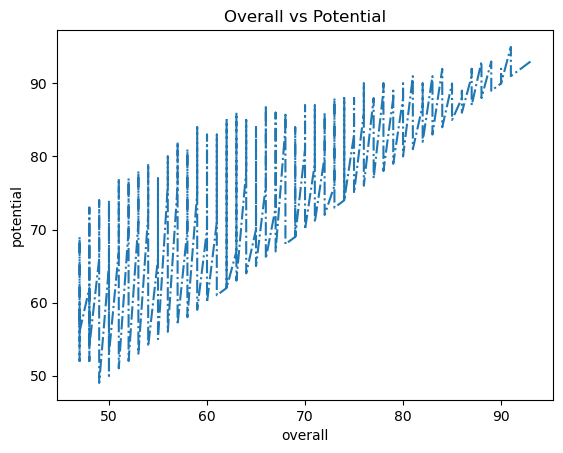

In [33]:
#Task 1.1
import pandas as pd
import matplotlib.pyplot as plt
football =pd.read_csv("fifa22.csv")
football=football.drop(columns=["long_name"])
football["short_name"]=football["short_name"].astype(str).str.lower()
value=football.nlargest(10,"value_eur")["short_name"]
plt.plot(football["overall"],football["potential"],linestyle="-.")
plt.xlabel("overall")
plt.ylabel("potential")
plt.title("Overall vs Potential")
football["potentialperwage"]=football["potential"]/football["wage_eur"]
best_buy=set(football.nlargest(193,"potentialperwage")["short_name"]) # top 1% of most undervalued players
football["valueperwage"]=football["value_eur"]/football["wage_eur"]
best_buy1=set(football.nlargest(193,"valueperwage")["short_name"])
overall_best=best_buy.intersection(best_buy1) # Found the intersection of both potentialperwage and valueperwage as the final top few undervalued
football["height_cm"]=football["height_cm"]*0.01 
football=football.rename(columns={"height_cm":"height_m"})
football.to_csv("editedfifa22.csv")
football.to_parquet("editedfifa22.parquet")

In [86]:
#Task 1.2
# as the players are paid weekly as per data we can equate the budget cap as 52*wage_eur
def good_player(player_position,budget_cap):
    import pandas as pd
    import matplotlib.pyplot as plt
    football =pd.read_csv("fifa22.csv")
    football["budget_cap"]=football["wage_eur"]*52
    goodbudgetcap = football[football["budget_cap"] < budget_cap]
    givenplayerpos = football[football['player_positions'].str.contains(player_position.upper())]
    good_player=pd.merge(givenplayerpos,goodbudgetcap,on="long_name")
    return good_player
# example test case : good_player("cm",16630000)

,sofifa_id_x,short_name_x,long_name,player_positions_x,overall_x,potential_x,value_eur_x,wage_eur_x,age_x,height_cm_x,...,sofifa_id_y,short_name_y,player_positions_y,overall_y,potential_y,value_eur_y,wage_eur_y,age_y,height_cm_y,budget_cap_y
0,215914,N. Kanté,N'Golo Kanté,"CDM, CM",90,90,100000000.0,230000.0,30,168,...,215914,N. Kanté,"CDM, CM",90,90,100000000.0,230000.0,30,168,11960000.0
1,182521,T. Kroos,Toni Kroos,CM,88,88,75000000.0,310000.0,31,183,...,182521,T. Kroos,CM,88,88,75000000.0,310000.0,31,183,16120000.0
2,177003,L. Modrić,Luka Modrić,CM,87,87,32000000.0,190000.0,35,172,...,177003,L. Modrić,CM,87,87,32000000.0,190000.0,35,172,9880000.0
3,195864,P. Pogba,Paul Pogba,"CM, LM",87,87,79500000.0,220000.0,28,191,...,195864,P. Pogba,"CM, LM",87,87,79500000.0,220000.0,28,191,11440000.0
4,199556,M. Verratti,Marco Verratti,"CM, CAM",87,87,79500000.0,155000.0,28,165,...,199556,M. Verratti,"CM, CAM",87,87,79500000.0,155000.0,28,165,8060000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,259219,N. Dias,Nestor Dias,CM,47,58,100000.0,500.0,22,180,...,259219,N. Dias,CM,47,58,100000.0,500.0,22,180,26000.0
4195,259737,H. Singh,Haobam Singh,CM,47,64,120000.0,500.0,18,170,...,259737,H. Singh,CM,47,64,120000.0,500.0,18,170,26000.0
4196,260398,N. Saliba,Nathan-Dylan Saliba,CM,47,69,150000.0,500.0,17,173,...,260398,N. Saliba,CM,47,69,150000.0,500.0,17,173,26000.0
4197,262040,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,175,...,262040,C. Porter,CM,47,59,110000.0,500.0,19,175,26000.0


In [47]:
#Task 1.3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
football =pd.read_csv("fifa22.csv")
scaler = StandardScaler()
football[["overall","potential","value_eur","wage_eur","age","height_cm"]]=scaler.fit_transform(football[["overall","potential","value_eur","wage_eur","age","height_cm"]])
scaler = MinMaxScaler(feature_range=(-1,1))
# Ill be scaleing every numerical term from 0 to 1 even though it doesnt make sense to scale age,etc.
#In the next step im rounding to 10 decimal places even though its not necessary
football[["overall","potential","value_eur","wage_eur","age","height_cm"]]=scaler.fit_transform(football[["overall","potential","value_eur","wage_eur","age","height_cm"]]).round(10)
football.to_csv("scaled_processed.csv")